<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Useful-Commands" data-toc-modified-id="Useful-Commands-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Useful Commands</a></span><ul class="toc-item"><li><span><a href="#login-remotely" data-toc-modified-id="login-remotely-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>login remotely</a></span></li><li><span><a href="#start-jupyter-notebook-remotely" data-toc-modified-id="start-jupyter-notebook-remotely-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>start jupyter notebook remotely</a></span></li><li><span><a href="#Conda-Environment" data-toc-modified-id="Conda-Environment-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Conda Environment</a></span></li><li><span><a href="#Check-GPU-use" data-toc-modified-id="Check-GPU-use-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Check GPU use</a></span></li></ul></li><li><span><a href="#Example-for-Monte-Carlo-Integration-for-Pi-with-CPU" data-toc-modified-id="Example-for-Monte-Carlo-Integration-for-Pi-with-CPU-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Example for Monte Carlo Integration for Pi with CPU</a></span></li><li><span><a href="#Example-for-Multivariate-Gaussian-Integrals-with-Monte-Carlo" data-toc-modified-id="Example-for-Multivariate-Gaussian-Integrals-with-Monte-Carlo-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Example for Multivariate Gaussian Integrals with Monte Carlo</a></span><ul class="toc-item"><li><span><a href="#Implement-on-Pytorch" data-toc-modified-id="Implement-on-Pytorch-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Implement on Pytorch</a></span></li><li><span><a href="#Implement-on-Numpy" data-toc-modified-id="Implement-on-Numpy-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Implement on Numpy</a></span></li></ul></li><li><span><a href="#Memory-Manerment" data-toc-modified-id="Memory-Manerment-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Memory Manerment</a></span><ul class="toc-item"><li><span><a href="#Useful-Command" data-toc-modified-id="Useful-Command-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Useful Command</a></span></li><li><span><a href="#Memory-Operations" data-toc-modified-id="Memory-Operations-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Memory Operations</a></span><ul class="toc-item"><li><span><a href="#Case-1" data-toc-modified-id="Case-1-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Case 1</a></span></li><li><span><a href="#Case-2" data-toc-modified-id="Case-2-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Case 2</a></span></li></ul></li></ul></li></ul></div>

## Useful Commands

### login remotely
```shellscript
ssh username@ip
```

### start jupyter notebook remotely
```shellscript
jupyter notebook --no-browser --port=8889
```
Start a new terminal and type in
```
ssh -N -L localhost:8888:localhost:8889 username@ip
```
You can copy 
```
http://localhost:8889/?token=d6b9097e0e3b3c1037be73e0513687ca47978f725558781c
```
Replace it with the port numer and paste it on web browser.
```
http://localhost:8888/?token=d6b9097e0e3b3c1037be73e0513687ca47978f725558781c
```

### Conda Environment
```
conda env list
```
```
source activate pytorch1.0
```

### Check GPU use
```
nvidia-smi
```

```
watch -n0.5 nvidia-smi
```

## Example for Monte Carlo Integration for Pi with CPU

ref: http://www.robots.ox.ac.uk/~bradley/blog/2018/05/Estimating-pi-with-Monte-Carlo-Integration.html

In [3]:
import setGPU # Use the least-load GPU
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import time

setGPU: Setting GPU to: 1


The value of integral is : 3.1456000000000004 
 and he value of pi is approximately: 3.1456000000000004 


<Figure size 432x288 with 0 Axes>

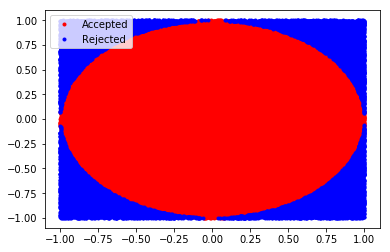

In [4]:
plt.clf()
r = 1
N= 100000
px = torch.distributions.Uniform(low=-r*torch.ones(N), high=r*torch.ones(N)).sample().numpy()
py = torch.distributions.Uniform(low=-r*torch.ones(N), high=r*torch.ones(N)).sample().numpy()
p  = np.concatenate((px.reshape(N,1),py.reshape(N,1)), axis=-1)
p_rr= (p[:,0]**2 + p[:,1]**2)
p_accept = p[np.where(p_rr <= r**2)]
p_reject = p[np.where(p_rr>r**2)]
fig, ax = plt.subplots()
ax.plot(p_accept[:,0], p_accept[:,1], 'r.', label='Accepted')
ax.plot(p_reject[:,0], p_reject[:,1], 'b.', label='Rejected')
plt.legend()
plt.show
print('The value of integral is : {0} \n and he value of pi is approximately: {1} '.format(4*r**2 * 1/N * len(p_accept), 4 * 1/N * len(p_accept)))

## Example for Multivariate Gaussian Integrals with Monte Carlo
### Implement on Pytorch

In [5]:
timer = time.time()
M=100;
sigc=0.1;
C=sigc/10*torch.randn(M, M).cuda()+torch.eye(M).cuda()
C=C*C.t()
Sum=0;
N=10**2;
batch_size=int(10**4*8);
Threshold=torch.nn.Threshold(0.0, 0,inplace=True)
P=torch.distributions.multivariate_normal.MultivariateNormal(torch.zeros(M).cuda(),  covariance_matrix=C)
for i in range(N):
    Sample=P.sample((batch_size,));
    Threshold(Sample, )
    Sum=Sum+torch.mean(Sample)
print (Sum/N)
del Sample, C, P
torch.cuda.empty_cache()
print('Time elapsed', -timer+time.time(), ' seconds')

tensor(0.3984, device='cuda:0')
Time elapsed 4.747890472412109  seconds


In [6]:
# Example of Threshold function
Threshold(torch.tensor([1.5 ,-1]))

tensor([1.5000, 0.0000])

### Implement on Numpy

In [5]:
timer = time.time()
M=100
size=int(8*10**4)
mean = np.zeros(M);
cov = np.eye(M);
x = np.random.multivariate_normal(mean, cov, (size))
N=10**2
Sum=0
for i in range(N):
    x = np.random.multivariate_normal(mean, cov, (size))
    x[np.where(x<0)]=0
    Sum=Sum+np.mean(x)
print (Sum/N)
print('Time elapsed', time.time()-timer, ' seconds')

0.39895619959728845
Time elapsed 37.01294231414795  seconds


## Memory Manerment
### Useful Command

```shellscript
htop
```

```shellscript
watch -n0.5 free -m
```
### Memory Operations

#### Case 1
Transformation from `numpy.array` to `torch.tensor` does not increase RAM memory


ref: https://discuss.pytorch.org/t/how-to-clear-some-gpu-memory/1945

In [7]:
n = 2**14
a_2GB = np.ones((n, n))  # RAM: +2GB

In [8]:
a_2GB_torch = torch.from_numpy(a_2GB)  # RAM: Same

In [27]:
del a_2GB  # RAM: Same

In [28]:
del a_2GB_torch  # RAM: -2GB

#### Case 2

After creating an variable `a_2GB_torch_gpu` at GPU, `del a_2GB_torch_gpu`  does not free the memory in GPU.


The meory is stored in GPU for reuse until clean it with `torch.cuda.empty_cache()`


In [30]:
n = 2**14
a_2GB = np.ones((n, n))  # RAM: +2GB
a_2GB_torch = torch.from_numpy(a_2GB)  # RAM: Same
a_2GB_torch_gpu = a_2GB_torch.cuda()  # RAM: same, GPU: +2GB 

In [31]:
del a_2GB_torch_gpu  # RAM: Same, GPU: Same

In [32]:
torch.cuda.empty_cache() # clear Cache  RAM: same, GPU: -2GB

In [33]:
a_2GB_torch_gpu= a_2GB_torch.cuda() # RAM: same, GPU: +2GB
del a_2GB_torch_gpu  # RAM: same, GPU: same

In [34]:
a_2GB_torch_gpu_2 = a_2GB_torch.cuda()  # RAM: same, GPU: same

In [35]:
a_2GB_torch_gpu_3 = a_2GB_torch.cuda()  # RAM: same, GPU: +2GB